In [1]:
import pandas as pd

## Data Preperation

### Arthmetic Operations

In [2]:
# read file

titanic = pd.read_csv('Pandas_Data\\titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [3]:
# data info

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [4]:
# create a dataframe with missing data %tage wise

pd.DataFrame({'Missing%tage': round(titanic.isnull().sum()/len(titanic)*100,2)})

,Missing%tage
survived,0.00
pclass,0.00
sex,0.00
age,19.87
sibsp,0.00
parch,0.00
fare,0.00
embarked,0.22
deck,77.22


**Deck has more than 77% of data is missing so it will be better to drop this column** <br>
**Whereas age has 20% of missing data and embarked has less than 1% missing data so we can impute the missing values for these columns**

##### drop deck column

In [5]:
# drop deck column

titanic.drop('deck', axis= 1, inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### fill missing values

In [6]:
# fill nan values of age with age mean

titanic['age'].fillna(titanic['age'].mean(), inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
# check unique values of the column embarked

titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# assign mode value to the nan values in the embarked column
# mode because it is a object type(titanic['embarked'].value_counts().index[0])

titanic['embarked'].fillna(titanic['embarked'].value_counts().index[0], inplace= True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Add/Sub/Mul/Div of columns

In [9]:
# add values of column sibsp and parch

titanic['sibsp']+titanic['parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [10]:
# add column values of column sibsp and parch by add method

titanic['sibsp'].add(titanic['parch'])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [11]:
# read file

sales = pd.read_csv('Pandas_Data\\sales.csv', index_col= 0)
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [12]:
# data info

sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [13]:
# total sales by each salesman for mon and thu

mon_thu_sales = sales['Mon'].add(sales['Thu'], fill_value= 0)
mon_thu_sales

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [14]:
# bonus sales of each salesman bonus by 12%,15%,10%,20% 

bonus = mon_thu_sales.mul([0.12,0.15,0.10,0.20])
bonus

Steven     4.08
Mike      19.80
Andi       2.50
Paul      26.40
dtype: float64

In [15]:
# total sales

total_sales = mon_thu_sales.add(bonus)
total_sales

Steven     38.08
Mike      151.80
Andi       27.50
Paul      158.40
dtype: float64

In [16]:
# back to original sales of each salesman for mon and thu

total_sales.sub(bonus)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [17]:
mon_thu_sales

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [19]:
# for division
# floor round down

mon_thu_sales.floordiv([12,15,10,20])

Steven    2.0
Mike      8.0
Andi      2.0
Paul      6.0
dtype: float64

In [20]:
# for division

mon_thu_sales.div([12,15,10,20])

Steven    2.833333
Mike      8.800000
Andi      2.500000
Paul      6.600000
dtype: float64

In [21]:
# for division

round(mon_thu_sales.div([12,15,10,20]))

Steven    3.0
Mike      9.0
Andi      2.0
Paul      7.0
dtype: float64

### Transformation/ Mapping

In [22]:
# read file

summer = pd.read_csv('Pandas_Data\\summer.csv')

In [23]:
# data sample
# random_state is like seed 

sample = summer.sample(n=7, random_state= 123).sort_values(by= 'Year')
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [24]:
# city unique values

sample['City'].unique()

array(['Paris', 'Mexico', 'Montreal', 'Moscow', 'Barcelona', 'Athens'],
      dtype=object)

In [25]:
# create a dictionary

city_country = {'Paris': 'France', 'Mexico': 'Mexico',
                'Montreal': 'Canada', 'Moscow': 'Russia',
                'Athens': 'Greece', 'New Delhi': 'India',
               'Barcelona': 'Spain'}
city_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Athens': 'Greece',
 'New Delhi': 'India',
 'Barcelona': 'Spain'}

In [26]:
# view data

sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [27]:
# map the data

sample['City'].map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [28]:
# view data

sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [29]:
# create new column

sample['Host Country'] = sample['City'].map(city_country)
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


### Conditional Transformation

In [30]:
# create new column

titanic['temp'] = titanic['parch'].add(titanic['sibsp'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [31]:
# filte data where value is 0

titanic[titanic['temp'] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp
2,1,3,female,26.000000,0,0,7.9250,S,0
4,0,3,male,35.000000,0,0,8.0500,S,0
5,0,3,male,29.699118,0,0,8.4583,Q,0
6,0,1,male,54.000000,0,0,51.8625,S,0
11,1,1,female,58.000000,0,0,26.5500,S,0
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S,0
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
889,1,1,male,26.000000,0,0,30.0000,C,0


In [32]:
import numpy as np

##### np.where()
`It is used to assign the values by filter data`
> It works on the series only

In [33]:
# by using np.where change the value of 0 to yes and other to no

pd.Series(np.where(titanic['temp'] == 0, 'yes', 'no'))

0       no
1       no
2      yes
3       no
4      yes
      ... 
886    yes
887    yes
888     no
889    yes
890    yes
Length: 891, dtype: object

In [34]:
# by using np.where change the value of 0 to yes and other to no

titanic['temp1'] = pd.Series(np.where(titanic['temp'] == 0, 'yes', 'no'))
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1
0,0,3,male,22.0,1,0,7.2500,S,1,no
1,1,1,female,38.0,1,0,71.2833,C,1,no
2,1,3,female,26.0,0,0,7.9250,S,0,yes
3,1,1,female,35.0,1,0,53.1000,S,1,no
4,0,3,male,35.0,0,0,8.0500,S,0,yes


In [35]:
# create new column and assign the value yes or no on the basis of the passed condition

titanic['child'] = pd.Series(np.where(titanic['age'] < 18, 'yes', 'no'))
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child
0,0,3,male,22.000000,1,0,7.2500,S,1,no,no
1,1,1,female,38.000000,1,0,71.2833,C,1,no,no
2,1,3,female,26.000000,0,0,7.9250,S,0,yes,no
3,1,1,female,35.000000,1,0,53.1000,S,1,no,no
4,0,3,male,35.000000,0,0,8.0500,S,0,yes,no
5,0,3,male,29.699118,0,0,8.4583,Q,0,yes,no
6,0,1,male,54.000000,0,0,51.8625,S,0,yes,no
7,0,3,male,2.000000,3,1,21.0750,S,4,no,yes
8,1,3,female,27.000000,0,2,11.1333,S,2,no,no
9,1,2,female,14.000000,1,0,30.0708,C,1,no,yes


### Discretization and Binning with pd.cut()
`cut is used to create bins(groups)`

In [37]:
# data sample

titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child
372,0,3,male,19.00,0,0,8.0500,S,0,yes,no
572,1,1,male,36.00,0,0,26.3875,S,0,yes,no
136,1,1,female,19.00,0,2,26.2833,S,2,no,no
305,1,1,male,0.92,1,2,151.5500,S,3,no,yes
655,0,2,male,24.00,2,0,73.5000,S,2,no,no
401,0,3,male,26.00,0,0,8.0500,S,0,yes,no
706,1,2,female,45.00,0,0,13.5000,S,0,yes,no
810,0,3,male,26.00,0,0,7.8875,S,0,yes,no
363,0,3,male,35.00,0,0,7.0500,S,0,yes,no
866,1,2,female,27.00,1,0,13.8583,C,1,no,no


In [40]:
titanic.age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [42]:
# create bins for the age column
# bins = [0,10,18,30,55,100]

age_bins = [0,10,18,30,55,100]
cats1 = pd.cut(titanic['age'], age_bins)
cats1

0      (18, 30]
1      (30, 55]
2      (18, 30]
3      (30, 55]
4      (30, 55]
         ...   
886    (18, 30]
887    (18, 30]
888    (18, 30]
889    (18, 30]
890    (30, 55]
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 18] < (18, 30] < (30, 55] < (55, 100]]

In [43]:
# create bins for the age column
# bins = [0,10,18,30,55,100]
# right= False means to include the start value and exclude the end value of the bin

cats = pd.cut(titanic['age'], age_bins, right= False)
cats

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [44]:
# type and value_counts of data

type(cats), '\n', cats.value_counts()

(pandas.core.series.Series,
 '\n',
 age
 [18, 30)     448
 [30, 55)     288
 [0, 10)       62
 [10, 18)      51
 [55, 100)     42
 Name: count, dtype: int64)

In [45]:
# create new column

titanic['age_group'] = cats
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group
0,0,3,male,22.0,1,0,7.2500,S,1,no,no,"[18, 30)"
1,1,1,female,38.0,1,0,71.2833,C,1,no,no,"[30, 55)"
2,1,3,female,26.0,0,0,7.9250,S,0,yes,no,"[18, 30)"
3,1,1,female,35.0,1,0,53.1000,S,1,no,no,"[30, 55)"
4,0,3,male,35.0,0,0,8.0500,S,0,yes,no,"[30, 55)"


In [46]:
# mean of survived where groupby age_group

titanic.groupby('age_group')['survived'].mean()

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_21220\3490594325.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('age_group')['survived'].mean()


age_group
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [47]:
# create list for bins

group_names = ['child', 'teenager', 'young adult', 'adult', 'elderly']
group_names

['child', 'teenager', 'young adult', 'adult', 'elderly']

In [48]:
# create bins for the age column
# bins = ['child', 'teenager', 'young adult', 'adult', 'elderly']
# right= False means to include the start value and exclude the end value of the bin
# lables means assign names to bins

pd.cut(titanic['age'], age_bins, right= False, labels= group_names)

0      young adult
1            adult
2      young adult
3            adult
4            adult
          ...     
886    young adult
887    young adult
888    young adult
889    young adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young adult' < 'adult' < 'elderly']

In [49]:
# create bins for the age column
# bins = ['child', 'teenager', 'young adult', 'adult', 'elderly']
# right= False means to include the start value and exclude the end value of the bin
# lables means assign names to bins

titanic['age_group'] = pd.cut(titanic['age'], age_bins, right= False, labels= group_names)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group
0,0,3,male,22.0,1,0,7.2500,S,1,no,no,young adult
1,1,1,female,38.0,1,0,71.2833,C,1,no,no,adult
2,1,3,female,26.0,0,0,7.9250,S,0,yes,no,young adult
3,1,1,female,35.0,1,0,53.1000,S,1,no,no,adult
4,0,3,male,35.0,0,0,8.0500,S,0,yes,no,adult


In [50]:
# view fare column

titanic['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [51]:
# create bins for the fare column

pd.cut(titanic['fare'], 5)

0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [52]:
# create 5 bins for fare column
# precision means decimals by default precision= 3

fare_group = pd.cut(titanic['fare'], 5, precision= 2)
fare_group

0      (-0.51, 102.47]
1      (-0.51, 102.47]
2      (-0.51, 102.47]
3      (-0.51, 102.47]
4      (-0.51, 102.47]
            ...       
886    (-0.51, 102.47]
887    (-0.51, 102.47]
888    (-0.51, 102.47]
889    (-0.51, 102.47]
890    (-0.51, 102.47]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.51, 102.47] < (102.47, 204.93] < (204.93, 307.4] < (307.4, 409.86] < (409.86, 512.33]]

In [53]:
# create new column and assign bins

titanic['fare_group'] = pd.cut(titanic['fare'], 5, precision= 0)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,1,no,no,young adult,"(-1.0, 102.0]"
1,1,1,female,38.0,1,0,71.2833,C,1,no,no,adult,"(-1.0, 102.0]"
2,1,3,female,26.0,0,0,7.9250,S,0,yes,no,young adult,"(-1.0, 102.0]"
3,1,1,female,35.0,1,0,53.1000,S,1,no,no,adult,"(-1.0, 102.0]"
4,0,3,male,35.0,0,0,8.0500,S,0,yes,no,adult,"(-1.0, 102.0]"


In [54]:
# value counts for the fare_group column

titanic['fare_group'].value_counts()

fare_group
(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: count, dtype: int64

In [55]:
# update column by assigning lables to the fare_group

titanic['fare_group'] = pd.cut(titanic['fare'], 5, precision= 0, labels= ['low', 'averge', 'above average', 'high', 'premium'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,1,no,no,young adult,low
1,1,1,female,38.0,1,0,71.2833,C,1,no,no,adult,low
2,1,3,female,26.0,0,0,7.9250,S,0,yes,no,young adult,low
3,1,1,female,35.0,1,0,53.1000,S,1,no,no,adult,low
4,0,3,male,35.0,0,0,8.0500,S,0,yes,no,adult,low


##### pd.qcut() quantile cut
`It is used to create bins quantile wise`

In [57]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [56]:
# create bins quantile wise

pd.qcut(titanic['fare'], [0,0.1,0.25,0.5,0.9,1], precision=0)

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [58]:
# mean of the survived column where data is groupby age_group and fare_group
# unstack the data

titanic.groupby(['age_group','fare_group'])['survived'].mean()

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_21220\4182199112.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['age_group','fare_group'])['survived'].mean()


age_group    fare_group   
child        low              0.616667
             averge           0.500000
             above average         NaN
             high                  NaN
             premium               NaN
teenager     low              0.391304
             averge           1.000000
             above average    1.000000
             high                  NaN
             premium               NaN
young adult  low              0.317016
             averge           0.625000
             above average    0.545455
             high                  NaN
             premium               NaN
adult        low              0.381132
             averge           0.812500
             above average    1.000000
             high                  NaN
             premium          1.000000
elderly      low              0.289474
             averge           0.666667
             above average    0.000000
             high                  NaN
             premium               Na

In [59]:
# mean of the survived column where data is groupby age_group and fare_group
# unstack the data

titanic.groupby(['age_group','fare_group'])['survived'].mean().unstack()

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_21220\1252279650.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['age_group','fare_group'])['survived'].mean().unstack()


fare_group,low,averge,above average,high,premium
age_group,,,,,
child,0.616667,0.500000,NaN,NaN,NaN
teenager,0.391304,1.000000,1.000000,NaN,NaN
young adult,0.317016,0.625000,0.545455,NaN,NaN
adult,0.381132,0.812500,1.000000,NaN,1.0
elderly,0.289474,0.666667,0.000000,NaN,NaN


##### cap and floor
> `Capping- It is used to handle the outliers, using capping we make sure that all the values of the feature falls in particular range. Capping can be done on both ends`

In [60]:
import matplotlib.pyplot as plt

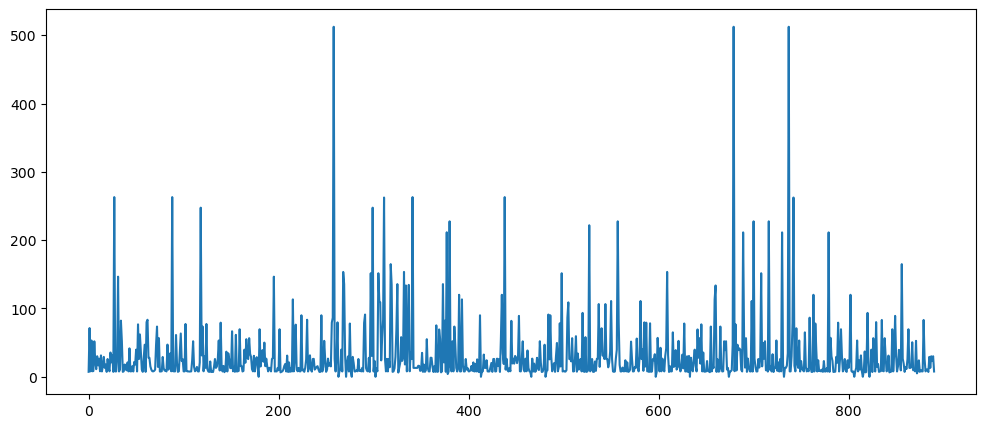

In [61]:
# plot the fare column data

titanic['fare'].plot(figsize = (12,5))
plt.show()

In [62]:
# describe data of fare column

titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [63]:
# sort_values of the fare column

titanic['fare'].sort_values(ascending= False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: fare, Length: 891, dtype: float64

In [64]:
# assign value 250 where fare > 250

fare_cap = 250
titanic.loc[titanic['fare'] > fare_cap, 'fare'] = fare_cap

In [65]:
# sort_values of the fare column

titanic['fare'].sort_values(ascending= False)

258    250.0
88     250.0
311    250.0
27     250.0
341    250.0
       ...  
633      0.0
413      0.0
822      0.0
732      0.0
674      0.0
Name: fare, Length: 891, dtype: float64

In [66]:
# assign 5 where fare is < 5

titanic.loc[titanic['fare'] < 5, 'fare'] = 5

In [67]:
# viw filter data

titanic[titanic['fare'] == 5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group,fare_group
179,0,3,male,36.000000,0,0,5.0,S,0,yes,no,adult,low
263,0,1,male,40.000000,0,0,5.0,S,0,yes,no,adult,low
271,1,3,male,25.000000,0,0,5.0,S,0,yes,no,young adult,low
277,0,2,male,29.699118,0,0,5.0,S,0,yes,no,young adult,low
302,0,3,male,19.000000,0,0,5.0,S,0,yes,no,young adult,low
378,0,3,male,20.000000,0,0,5.0,C,0,yes,no,young adult,low
413,0,2,male,29.699118,0,0,5.0,S,0,yes,no,young adult,low
466,0,2,male,29.699118,0,0,5.0,S,0,yes,no,young adult,low
481,0,2,male,29.699118,0,0,5.0,S,0,yes,no,young adult,low
597,0,3,male,49.000000,0,0,5.0,S,0,yes,no,adult,low


### Scailing/Standardization
`Scailing is used to scale down all the variables/features into same range`<br>
`By scailing we remove the bias of machine learning model towards specific feature`

In [68]:
# data descriptive statistics

titanic.describe()

,survived,pclass,age,sibsp,parch,fare,temp
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,31.320089,0.904602
std,0.486592,0.836071,13.002015,1.102743,0.806057,42.517981,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,250.000000,10.000000


<Axes: >

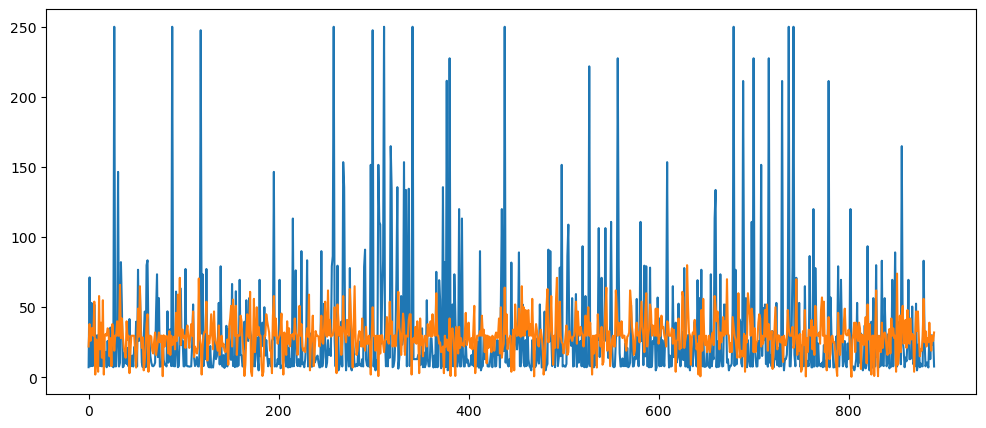

In [69]:
# plot data of fare and age

titanic['fare'].plot(figsize= (12,5))
titanic['age'].plot(figsize= (12,5))

In [70]:
# standard deviation of age and fare

age_std = titanic['age'].std()
fare_std = titanic['fare'].std()
age_std, fare_std

(13.002015226002884, 42.51798106061596)

In [71]:
# write a function to normalize the data

def normalize(feature):
    data_mean = titanic[feature].mean()
    data_std = titanic[feature].std()
    return (titanic[feature]-data_mean)/data_std

In [72]:
# create a new column

titanic['scaled_age'] = normalize('age')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group,fare_group,scaled_age
0,0,3,male,22.000000,1,0,7.2500,S,1,no,no,young adult,low,-0.592148
1,1,1,female,38.000000,1,0,71.2833,C,1,no,no,adult,low,0.638430
2,1,3,female,26.000000,0,0,7.9250,S,0,yes,no,young adult,low,-0.284503
3,1,1,female,35.000000,1,0,53.1000,S,1,no,no,adult,low,0.407697
4,0,3,male,35.000000,0,0,8.0500,S,0,yes,no,adult,low,0.407697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,yes,no,young adult,low,-0.207592
887,1,1,female,19.000000,0,0,30.0000,S,0,yes,no,young adult,low,-0.822881
888,0,3,female,29.699118,1,2,23.4500,S,3,no,no,young adult,low,0.000000
889,1,1,male,26.000000,0,0,30.0000,C,0,yes,no,young adult,low,-0.284503


In [73]:
# create a new column

titanic['scaled_fare'] = normalize('fare')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,temp,temp1,child,age_group,fare_group,scaled_age,scaled_fare
0,0,3,male,22.000000,1,0,7.2500,S,1,no,no,young adult,low,-0.592148,-0.566116
1,1,1,female,38.000000,1,0,71.2833,C,1,no,no,adult,low,0.638430,0.939913
2,1,3,female,26.000000,0,0,7.9250,S,0,yes,no,young adult,low,-0.284503,-0.550240
3,1,1,female,35.000000,1,0,53.1000,S,1,no,no,adult,low,0.407697,0.512252
4,0,3,male,35.000000,0,0,8.0500,S,0,yes,no,adult,low,0.407697,-0.547300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,yes,no,young adult,low,-0.207592,-0.430879
887,1,1,female,19.000000,0,0,30.0000,S,0,yes,no,young adult,low,-0.822881,-0.031048
888,0,3,female,29.699118,1,2,23.4500,S,3,no,no,young adult,low,0.000000,-0.185100
889,1,1,male,26.000000,0,0,30.0000,C,0,yes,no,young adult,low,-0.284503,-0.031048


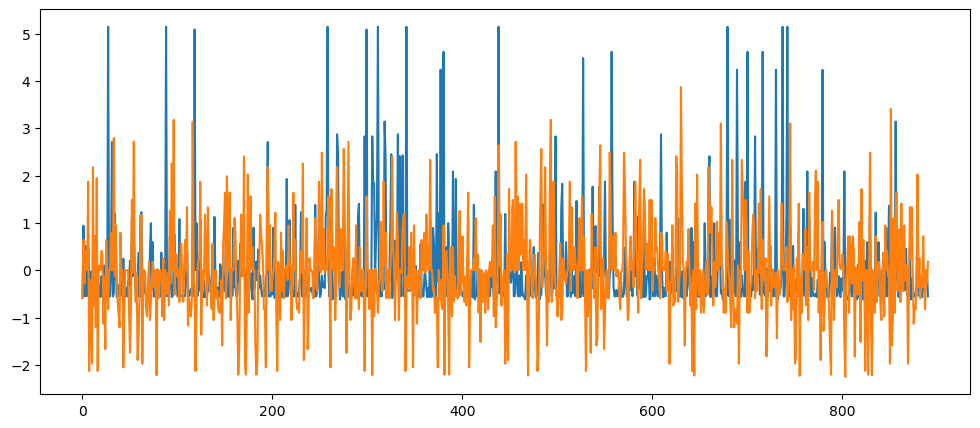

In [74]:
# plot data

titanic['scaled_fare'].plot(figsize= (12,5))
titanic['scaled_age'].plot(figsize= (12,5));

### get_dummies()/one-hot-encoding
`It works on cateogrical data`

In [75]:
# read file

titanic = pd.read_csv('Pandas_Data\\titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [76]:
# data head

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [77]:
# emb column unique values

titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
# fill na of emb column with its mode value

titanic['embarked'].fillna(titanic['embarked'].unique()[0], inplace= True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [79]:
# emb column unique values

titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [80]:
# create dummies for the column embarked
# dummies make columns for all unique values and assign values as 1 and 0
# 1 means that it contains data and 0 means there is no data in that

pd.get_dummies(titanic['embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [81]:
# create dummies foe the column embarked
# dummies make columns for all unique values and assign values as 1 and 0
# 1 means that it contains data and 0 means there is no data in that
# drop_first means drop the 1st column because that column value can be assumed by other columns

pd.get_dummies(titanic['embarked'], drop_first= True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [82]:
# create dummies for the column embarked and sex
# dummies make columns for all unique values and assign values as 1 and 0
# 1 means that it contains data and 0 means there is no data in that
# drop_first means drop the 1st column because that column value can be assumed by other columns

pd.get_dummies(titanic, columns = ['embarked','sex'], drop_first= True)

,survived,pclass,age,sibsp,parch,fare,deck,embarked_Q,embarked_S,sex_male
0,0,3,22.0,1,0,7.2500,NaN,False,True,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,NaN,False,True,False
3,1,1,35.0,1,0,53.1000,C,False,True,False
4,0,3,35.0,0,0,8.0500,NaN,False,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,False,True,True
887,1,1,19.0,0,0,30.0000,B,False,True,False
888,0,3,NaN,1,2,23.4500,NaN,False,True,False
889,1,1,26.0,0,0,30.0000,C,False,False,True


In [83]:
# deck column unique values

titanic['deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [84]:
# create dummies for the column deck where there are NaN values
# it creates unique values column except the NaN
# It is wrong according to machine learning, as it include NaN value
# the data should be cleaned first to work on it

pd.get_dummies(titanic['deck'])

,A,B,C,D,E,F,G
0,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,True,False,False,False,False,False
888,False,False,False,False,False,False,False
889,False,False,True,False,False,False,False


In [85]:
# create dummies for the column deck where there are NaN values
# it creates unique values column except the NaN
# It is wrong according to machine learning, as it include NaN value
# the data should be cleaned first to work on it

pd.get_dummies(titanic['deck'], dummy_na= True)

,A,B,C,D,E,F,G,NaN
0,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True
887,False,True,False,False,False,False,False,False
888,False,False,False,False,False,False,False,True
889,False,False,True,False,False,False,False,False


### String Operations

In [86]:
# read file

summer = pd.read_csv('Pandas_Data\\summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [87]:
# data head

summer.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [88]:
# convert athlete column names into title(each 1st char upper)

summer['Athlete'] = summer['Athlete'].str.title()
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"Janikowski, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"Rezaei, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"Totrov, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"Aleksanyan, Artur",ARM,Men,Wg 96 KG,Bronze


In [89]:
# split the athlete column with ',' where expand= false
# expand = False means show split data in single column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 1, expand= False)

0                    [Hajos,  Alfred]
1                 [Herschmann,  Otto]
2                [Drivas,  Dimitrios]
3               [Malokinis,  Ioannis]
4               [Chasapis,  Spiridon]
                     ...             
31160           [Janikowski,  Damian]
31161    [Rezaei,  Ghasem Gholamreza]
31162               [Totrov,  Rustam]
31163            [Aleksanyan,  Artur]
31164               [Lidberg,  Jimmy]
Name: Athlete, Length: 31165, dtype: object

In [90]:
# split the athlete column with ',' where expand= false
# expand = True means show split data in multiple column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 1, expand= True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [91]:
# split the athlete column with ',' where expand= false
# expand = False means show split data in single column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 6, expand= False)

0                    [Hajos,  Alfred]
1                 [Herschmann,  Otto]
2                [Drivas,  Dimitrios]
3               [Malokinis,  Ioannis]
4               [Chasapis,  Spiridon]
                     ...             
31160           [Janikowski,  Damian]
31161    [Rezaei,  Ghasem Gholamreza]
31162               [Totrov,  Rustam]
31163            [Aleksanyan,  Artur]
31164               [Lidberg,  Jimmy]
Name: Athlete, Length: 31165, dtype: object

In [99]:
# split the athlete column with ',' where expand= false
# expand = False means show split data in single column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 2, expand= True)

,0,1,2
0,Hajos,Alfred,None
1,Herschmann,Otto,None
2,Drivas,Dimitrios,None
3,Malokinis,Ioannis,None
4,Chasapis,Spiridon,None
...,...,...,...
31160,Janikowski,Damian,None
31161,Rezaei,Ghasem Gholamreza,None
31162,Totrov,Rustam,None
31163,Aleksanyan,Artur,None


In [100]:
# split the athlete column with ',' where expand= false
# expand = False means show split data in single column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 1, expand= False)[0]

['Hajos', ' Alfred']

In [492]:
# split the athlete column with ',' where expand= false
# expand = True means show split data in multiple column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', expand= True)

,0,1,2
0,Hajos,Alfred,None
1,Herschmann,Otto,None
2,Drivas,Dimitrios,None
3,Malokinis,Ioannis,None
4,Chasapis,Spiridon,None
...,...,...,...
31160,Janikowski,Damian,None
31161,Rezaei,Ghasem Gholamreza,None
31162,Totrov,Rustam,None
31163,Aleksanyan,Artur,None


In [101]:
# split the athlete column with ',' where expand= false
# expand = True means show split data in multiple column
# we should use 'n' when expand= True only
# when we want each word of the split in that case 'n' should be equal to number of splits

summer['Athlete'].str.split(',', n= 4, expand= True)

,0,1,2
0,Hajos,Alfred,None
1,Herschmann,Otto,None
2,Drivas,Dimitrios,None
3,Malokinis,Ioannis,None
4,Chasapis,Spiridon,None
...,...,...,...
31160,Janikowski,Damian,None
31161,Rezaei,Ghasem Gholamreza,None
31162,Totrov,Rustam,None
31163,Aleksanyan,Artur,None


In [102]:
# create 2 new column by spliting a single column

summer[['Surname','Name']] = summer['Athlete'].str.split(',', n= 1, expand= True)

In [103]:
# view data

summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon


In [104]:
# remove extra spaces from column surname

summer['Surname'] = summer['Surname'].str.strip()
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"Janikowski, Damian",POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,"Rezaei, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,"Totrov, Rustam",RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,"Aleksanyan, Artur",ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur


In [105]:
# remove extra spaces from column name

summer['Name'] = summer['Name'].str.strip()
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"Janikowski, Damian",POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,"Rezaei, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,"Totrov, Rustam",RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,"Aleksanyan, Artur",ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur
